# **Movimiento de un Satélite Artificial a partir de las Leyes de Kepler**


A partir de resolver la ecuacion de Kepler para el movimiento:
$$
E - e \sin E = \sqrt{\frac{GM}{a^3}} (t - t_p)
$$

# Condiciones Iniciales: 

\begin{aligned}
    a &= 1.30262 \times R_{\oplus} \\
    e &= 0.16561 \\
    \omega &= 15^\circ \\
    t_p &= 2025 - 03 - 31 \; 00:00:00 \; \textit{UTC}
\end{aligned}



In [66]:
import numpy as np
from astropy.constants import G, M_earth,R_earth
from astropy.time import Time
import matplotlib.pyplot as plt
from astropy.time import TimeDelta


# Definimos los parámetros físicos con Astropy
e =0.16561 # Excentricidad


omega=np.radians(15)
a = 1.30262 * R_earth.value # Semi-eje mayor en radios terrestres

# Definimos los tiempos en formato UTC
t_p = Time("2025-03-31 00:00:00", format="iso", scale="utc")  # Momento del periastro



In [67]:


def kepler_equation(a, e, t, t_p, E0=0.0, tol=1e-10, max_iter=100):
    # Convertir tiempos a segundos y calcular la anomalía media M
    delta_t = (t - t_p).to_value('sec')
    M = np.sqrt(G.value * M_earth.value / a**3) * delta_t  # Anomalía media

    # Definimos la ecuación de Kepler y su derivada
    def f(E):
        return E - e * np.sin(E) - M

    def df(E):
        return 1 - e * np.cos(E)
    
    E = E0  # Inicialización con el valor inicial

    for _ in range(max_iter):
        fE = f(E)
        dfE = df(E)
        
        if abs(dfE) < 1e-12:  # Evita divisiones por cero
            raise ValueError("Derivada cercana a cero. Método falló.")
        
        E_new = E - fE / dfE  # Método de Newton-Raphson
        
        if abs(E_new - E) < tol:  # Criterio de convergencia
            return E_new
        
        E = E_new  # Actualización para la siguiente iteración

    raise ValueError("El método de Newton no convergió después de {} iteraciones.".format(max_iter))



In [68]:


def true_anomaly(E, e):
    c = np.sqrt((1 + e) / (1 - e))
    f = 2 * np.arctan(c* np.tan(E / 2))
    return f


In [69]:
# Función para calcular la posición
def position(t):
    # Calcular la anomalía media M
    n = np.sqrt(398600.4405 * 1e9 / a**3)  # Movimiento medio en rad/s
    M_t = n * (t - t_p).to('s').value

    # Resolver la ecuación de Kepler para obtener E
    E_t = kepler_equation(a, e, t, t_p)

    # Calcular la anomalía verdadera
    f_t = 2 * np.arctan(np.sqrt((1 + e) / (1 - e)) * np.tan(E_t / 2))

    # Calcular el radio orbital
    r_t = a * (1 - e**2) / (1 + e * np.cos(f_t))

    # Calcular el ángulo polar
    phi_t = f_t + omega

    # Convertir a grados
    phi_t_deg = np.degrees(phi_t)
    f_t_deg = np.degrees(f_t)

    return {
        "Anomalía excéntrica (E)": E_t,
        "Anomalía verdadera (f)": f_t_deg,
        "Radio orbital (r)": r_t,
        "Ángulo polar (phi)": phi_t_deg,
        "x": r_t * np.cos(phi_t),
        "y": r_t * np.sin(phi_t)
    }




In [70]:
t = Time("2025-04-01 00:00:00", format="iso", scale="utc")
result = position(t)

# Imprimir resultados
print(f"Radio orbital r(t): {result['Radio orbital (r)'] / 1000:.2f} km")
print(f"Ángulo polar phi(t): {result['Ángulo polar (phi)']:.6f}°")

Radio orbital r(t): 9658.41 km
Ángulo polar phi(t): 185.596558°


# **ORBITA DEL SATELITE**

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import TimeDelta

def orbit():
    t_values = [t_p + TimeDelta(dt, format='sec') for dt in np.linspace(0, 10000, 800)]
    
    # Calcular posiciones
    positions = [position(t) for t in t_values]
    x_values = [p["x"] / 1000 for p in positions]
    y_values = [p["y"] / 1000 for p in positions]

    # Crear la figura más pequeña
    plt.figure(figsize=(5, 5))  # Ajuste de tamaño a 5x5 pulgadas
    
    # Graficar la órbita
    plt.plot(x_values, y_values, label="Órbita", color='dodgerblue', linewidth=2)

    # Posición de la Tierra en el centro
    plt.scatter([0], [0], color='red', marker='o', s=80, label="Tierra")  # Tamaño ajustado

    # Mejoras visuales
    plt.xlabel("x (km)", fontsize=10)
    plt.ylabel("y (km)", fontsize=10)
    plt.title("Órbita del Satélite", fontsize=12, fontweight='bold')
    plt.legend(fontsize=9)
    plt.axis("equal")
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    # Centrar el origen en la gráfica
    plt.axhline(0, color='black', linewidth=0.6, alpha=0.6)
    plt.axvline(0, color='black', linewidth=0.6, alpha=0.6)

    # Mostrar la gráfica
    plt.show()


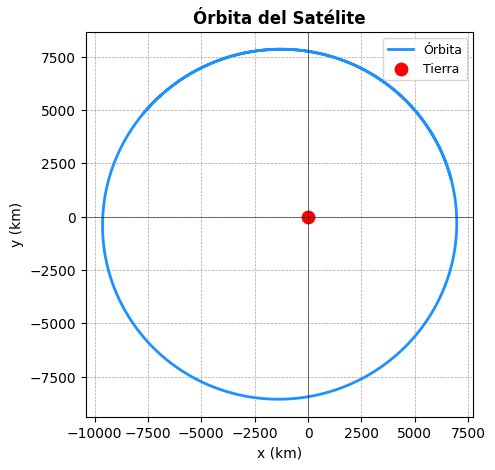

In [72]:
orbit()